In [1]:
ruta="https://raw.githubusercontent.com/marinlopabi/Temas-Selectos-PQ-AD-Python/refs/heads/main/Datos/WALMEX.csv"

In [2]:
import pandas as pd
df=pd.read_csv(ruta)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-07-01,69.68,70.83,68.66,70.23,68.81,7838854.0
1,2022-07-04,70.19,71.51,69.48,69.79,68.38,2529165.0
2,2022-07-05,69.51,70.00,67.93,69.66,68.25,11473504.0
3,2022-07-06,69.27,70.87,68.61,68.83,67.45,7774514.0
4,2022-07-07,68.84,69.73,68.66,68.90,67.51,8896357.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       252 non-null    object 
 1   Open       252 non-null    float64
 2   High       252 non-null    float64
 3   Low        252 non-null    float64
 4   Close      252 non-null    float64
 5   Adj Close  252 non-null    float64
 6   Volume     252 non-null    float64
dtypes: float64(6), object(1)
memory usage: 13.9+ KB


In [4]:
df['Date'] = pd.to_datetime(df['Date'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       252 non-null    datetime64[ns]
 1   Open       252 non-null    float64       
 2   High       252 non-null    float64       
 3   Low        252 non-null    float64       
 4   Close      252 non-null    float64       
 5   Adj Close  252 non-null    float64       
 6   Volume     252 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 13.9 KB


In [6]:
df = df.set_index("Date")
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-07-01,69.68,70.83,68.66,70.23,68.81,7838854.0
2022-07-04,70.19,71.51,69.48,69.79,68.38,2529165.0
2022-07-05,69.51,70.00,67.93,69.66,68.25,11473504.0
2022-07-06,69.27,70.87,68.61,68.83,67.45,7774514.0
2022-07-07,68.84,69.73,68.66,68.90,67.51,8896357.0
...,...,...,...,...,...,...
2023-06-26,67.72,68.94,67.55,68.37,68.37,12024363.0
2023-06-27,68.20,69.90,68.11,69.79,69.79,14891285.0
2023-06-28,69.41,69.69,68.08,68.50,68.50,12828559.0


In [7]:
df.sum()


,0
Open,1.810484e+04
High,1.831748e+04
Low,1.788520e+04
Close,1.809251e+04
Adj Close,1.787944e+04
Volume,3.467131e+09


In [8]:
df.idxmax()

,0
Open,2022-11-03
High,2022-11-01
Low,2022-11-01
Close,2022-11-01
Adj Close,2022-11-01
Volume,2023-05-31


In [9]:
df.idxmin()

,0
Open,2022-09-01
High,2023-06-13
Low,2022-08-31
Close,2022-08-31
Adj Close,2022-08-31
Volume,2022-12-26


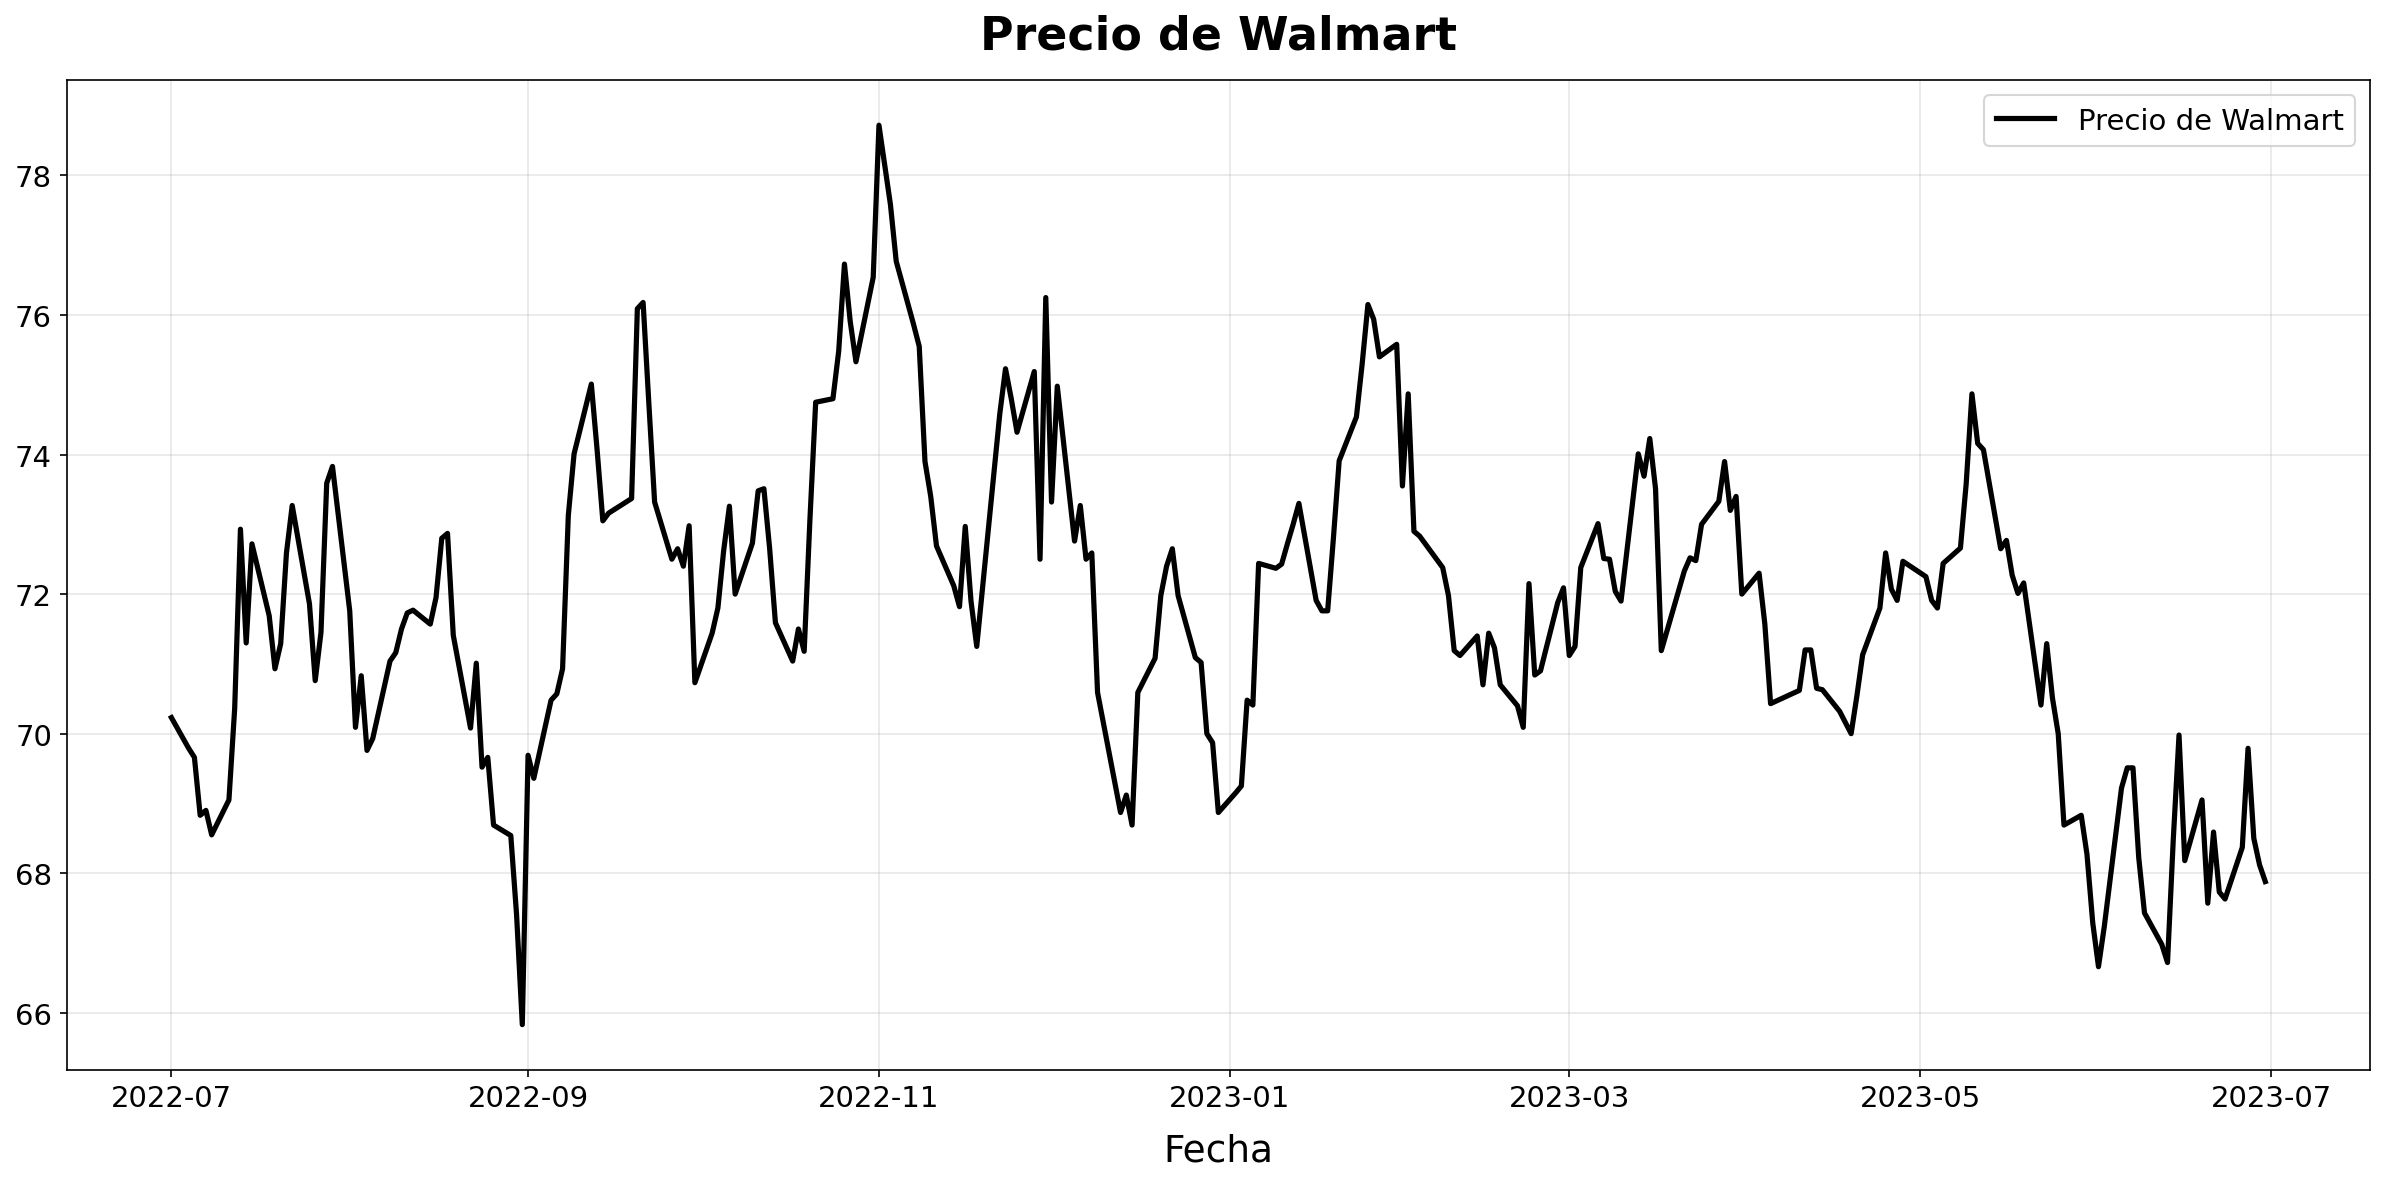

In [12]:
import matplotlib.pyplot as plt
#Crear Figura y eje
plt.figure(figsize=(16,8),dpi=150)
#Línea principal del precio
plt.plot(df.index,df["Close"],lw=2.5, color='black',label='Precio de Walmart')
#Etiquetas y titulos
plt.xlabel('Fecha',fontsize=18, labelpad=10)
plt.title('Precio de Walmart',fontsize=22, fontweight='bold', pad=15)

# Configuración del gráfico
plt.grid(alpha=0.3)
plt.tick_params(labelsize=14)
plt.legend(fontsize=14)
plt.tight_layout()

plt.show()

Si mejoramos el codigo con la IA obtenemos lo siguiente

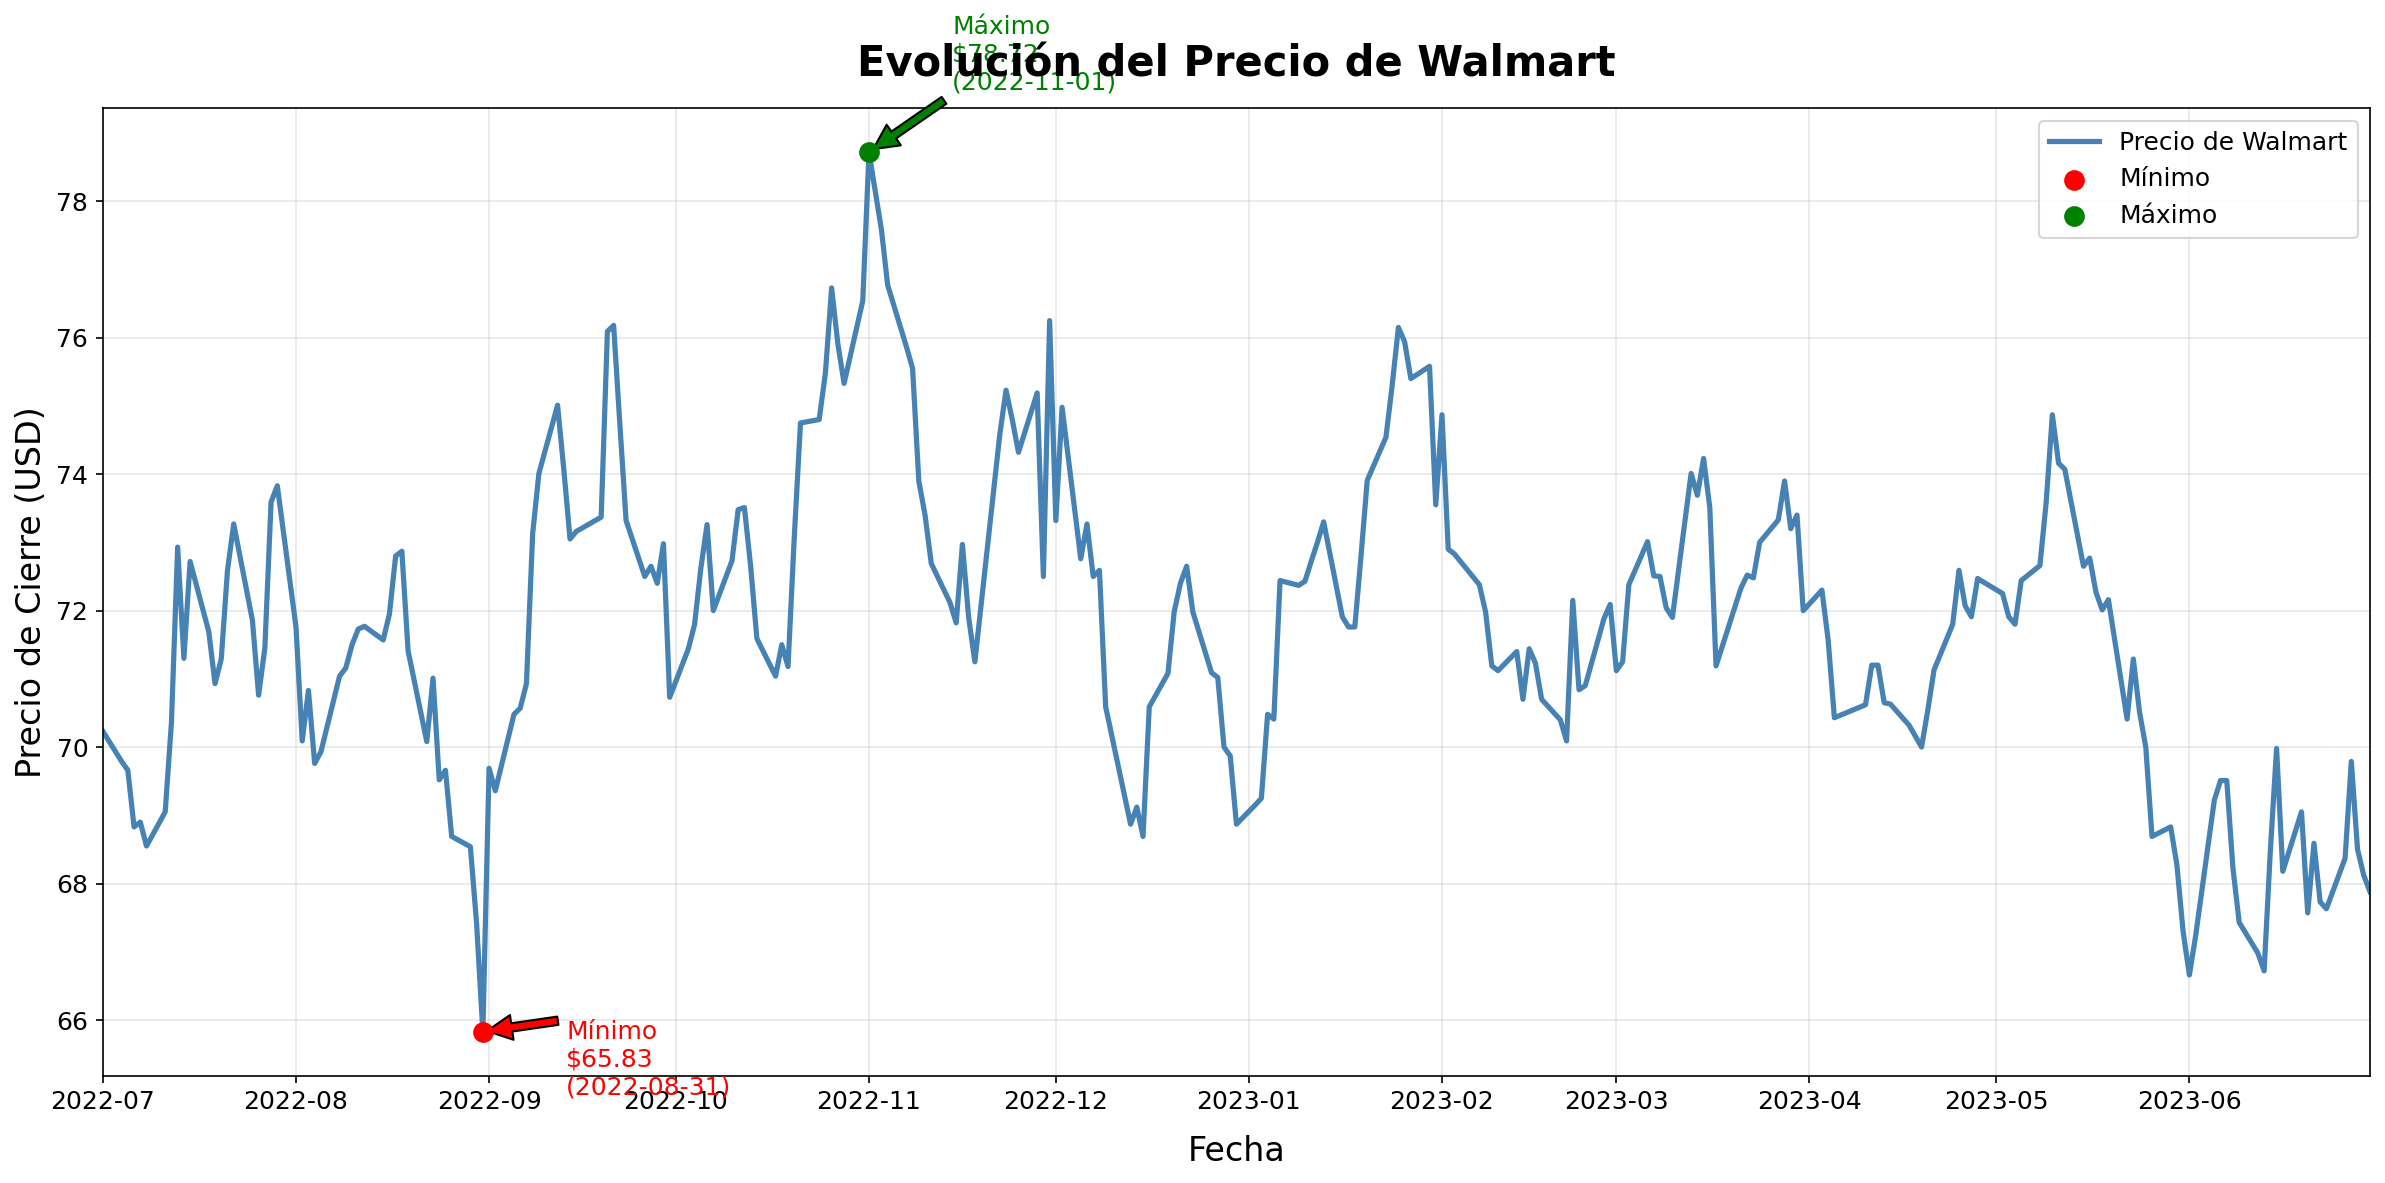

Precio mínimo: $65.83 el 2022-08-31
Precio máximo: $78.72 el 2022-11-01


In [14]:
import matplotlib.pyplot as plt
import pandas as pd

# --- Suponiendo que ya tienes tu DataFrame 'df' con índice de fechas y columna 'Close' ---

# Calcular mínimo y máximo
min_price = df["Close"].min()
max_price = df["Close"].max()
min_date = df["Close"].idxmin()
max_date = df["Close"].idxmax()

# Crear figura y ejes
plt.figure(figsize=(16, 8), dpi=150)

# Línea principal del precio
plt.plot(df.index, df["Close"],
         lw=2.5, color='steelblue', label='Precio de Walmart')

# Puntos mínimo y máximo
plt.scatter(min_date, min_price, color='red', s=80, zorder=5, label='Mínimo')
plt.scatter(max_date, max_price, color='green', s=80, zorder=5, label='Máximo')


# Expandimos un poco los límites del eje Y (por ejemplo, 5%)
y_min, y_max = df["Close"].min(), df["Close"].max()
plt.ylim(y_min - 0.05*(y_max - y_min), y_max + 0.05*(y_max - y_min))

# Expandimos también los límites del eje X un poco
plt.xlim(df.index.min(), df.index.max())

# --- ANOTACIONES DINÁMICAS ---

# Si el punto mínimo está en la mitad izquierda, anotamos hacia la derecha; si no, hacia la izquierda
if min_date < df.index[len(df)//2]:
    xytext_min = (40, -30)  # anotar hacia la derecha
else:
    xytext_min = (-80, -30)  # anotar hacia la izquierda

# Lo mismo para el máximo
if max_date < df.index[len(df)//2]:
    xytext_max = (40, 30)
else:
    xytext_max = (-80, 30)

# Anotación para el mínimo
plt.annotate(f'Mínimo\n${min_price:.2f}\n({min_date.date()})',
             xy=(min_date, min_price),
             xytext=xytext_min,
             textcoords='offset points',
             arrowprops=dict(facecolor='red', shrink=0.05),
             fontsize=12, color='red')

# Anotación para el máximo
plt.annotate(f'Máximo\n${max_price:.2f}\n({max_date.date()})',
             xy=(max_date, max_price),
             xytext=xytext_max,
             textcoords='offset points',
             arrowprops=dict(facecolor='green', shrink=0.05),
             fontsize=12, color='green')

# --- CONFIGURACIÓN DEL GRÁFICO ---

plt.xlabel('Fecha', fontsize=16, labelpad=10)
plt.ylabel('Precio de Cierre (USD)', fontsize=16)
plt.title('Evolución del Precio de Walmart', fontsize=20, fontweight='bold', pad=15)
plt.grid(alpha=0.3)
plt.tick_params(labelsize=12)
plt.legend(fontsize=12)
plt.tight_layout()

plt.show()

# --- IMPRIMIR VALORES EN CONSOLA ---
print(f"Precio mínimo: ${min_price:.2f} el {min_date.date()}")
print(f"Precio máximo: ${max_price:.2f} el {max_date.date()}")
